# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Why Are We Typically Advised To Set Seeds for Random Generators?

Post Link: [Substack](https://avichawla.substack.com/p/why-are-we-typically-advised-to-set)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7041725016811483137/)

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import make_circles
import itertools as it

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

In [4]:
plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']
colors = [ '#FF7051', '#00B9FF', '#46C7C7']

## Create Dataset

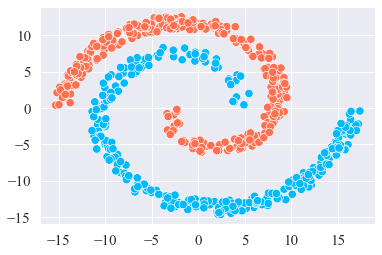

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of data points
N = 300

# Define the two spiral arms
theta = np.sqrt(np.random.rand(N)) * 2 * np.pi  # angle
r_a = 2 * theta + np.pi + 2*np.random.rand(N) # radius for arm a
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
r_b = -2 * theta - np.pi + 2*np.random.rand(N) # radius for arm b
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T

# Shift the two arms to have the same center
shift = np.array([0,0])  # x-y shift
data_a += shift
data_b -= shift

# Concatenate the two arms
data = np.concatenate((data_a, data_b))

# Create the target labels
labels = np.concatenate((np.ones(N), np.zeros(N)))

# Shuffle the data and labels in unison
indices = np.random.permutation(N * 2)
data, labels = data[indices], labels[indices]

# Visualize the dataset
sns.scatterplot(data[:, 0], data[:, 1], c=[colors[int(label)] for label in labels], s = 70, )
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Process Dataset

In [6]:
X = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.long)

x_min, x_max = float(X[:, 0].min()), float(X[:, 0].max())
y_min, y_max = float(X[:, 1].min()), float(X[:, 1].max())

new_x_max, new_x_min = 4, -4
new_y_max, new_y_min = 4, -4

X[:, 0] = (((X[:, 0] - x_min)/(x_max-x_min))*(new_x_max-new_x_min)) + new_x_min
X[:, 1] = (((X[:, 1] - y_min)/(y_max-y_min))*(new_y_max-new_y_min)) + new_y_min

## Train Model

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)
        self.fc3 = nn.Linear(2, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
def accuracy(outputs, labels):
    return int(torch.sum(torch.argmax(outputs, axis = 1) == y))/len(outputs)

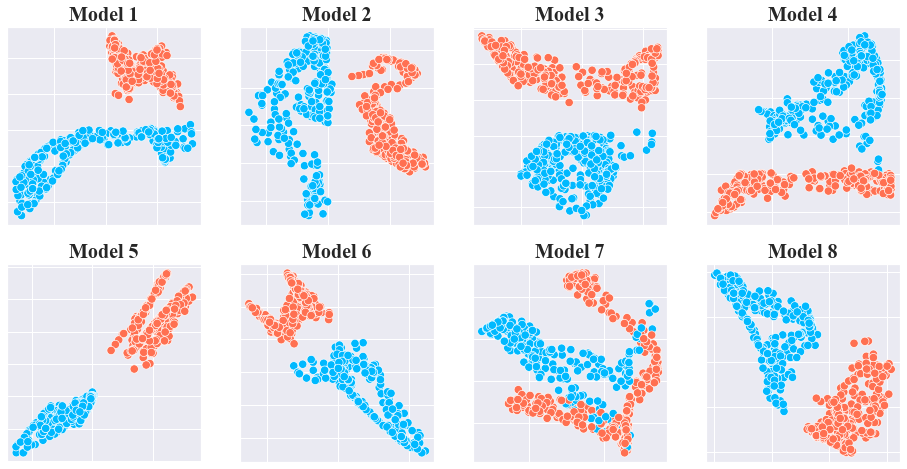

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(8):
    # Define the model
    input_size = 2
    hidden_size = 100
    total_epochs = 300
    model = NeuralNetwork(input_size, hidden_size)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(total_epochs):

        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = accuracy(outputs, y)

    x = F.relu(model.fc1(X))
    x = (model.fc2(x)).detach().numpy()
    
    ax_ = sns.scatterplot(x[:, 0], x[:, 1], ax=axes[i//4,i%4], c=[colors[int(label)] for label in labels], s = 70, )
    ax_.set_title(f"Model {i+1}", fontsize = 20, fontweight="bold")
    ax_.set(xlabel=None, ylabel=None, yticklabels=[], xticklabels=[])
plt.show()